In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = yf.download("MSFT", start = "2025-1-1", end = "2025-06-30")

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2025-01-02,416.976868,424.438202,413.261173,423.900262,16896500
2025-01-03,421.728607,422.405996,417.933202,419.467282,16662900
2025-01-06,426.211365,432.656586,423.850447,426.360784,20573600
2025-01-07,420.752350,429.000637,419.188356,427.356962,18139100
2025-01-08,422.933960,425.334733,419.925537,421.838167,15054600


In [4]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2025-06-23,486.000000,487.750000,472.510010,478.209991,24864000
2025-06-24,490.109985,491.850006,486.799988,488.950012,22305600
2025-06-25,492.269989,494.559998,489.390015,492.040009,17495100
2025-06-26,497.450012,498.040009,492.809998,492.980011,21578900
2025-06-27,495.940002,499.299988,493.029999,497.549988,34539200


In [5]:
data.index.freq

<Axes: xlabel='Date'>

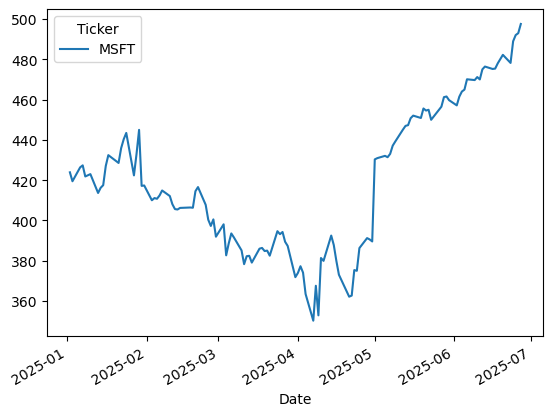

In [6]:
data["Open"].plot()

In [7]:
data.shape

(121, 5)

In [8]:
# Classicla decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
additive_decomposition = seasonal_decompose(data["Close"], model = "Additive", period = 30)

In [10]:
additive_trend = additive_decomposition.trend
additive_seasonal = additive_decomposition.seasonal
additive_residual = additive_decomposition.resid

<Axes: xlabel='Date'>

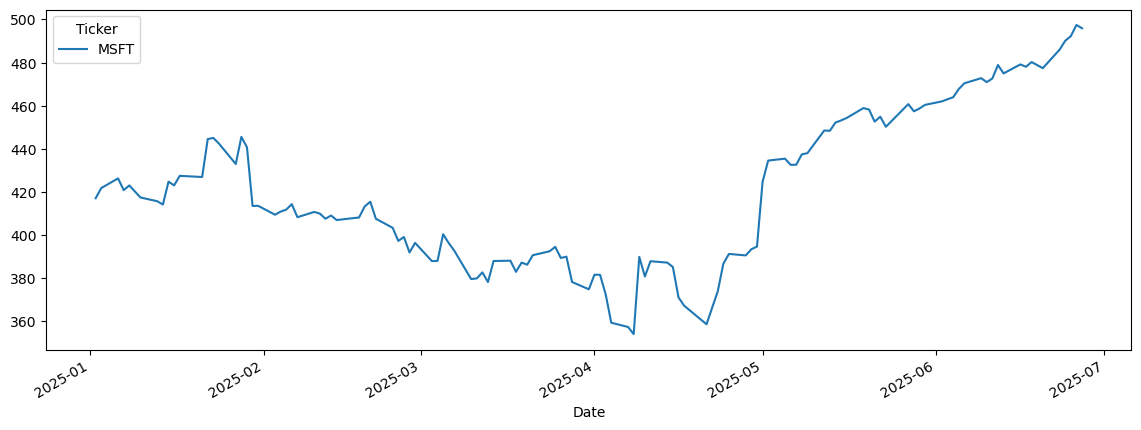

In [11]:
data["Close"].plot(figsize = (14, 5))

<Axes: xlabel='Date'>

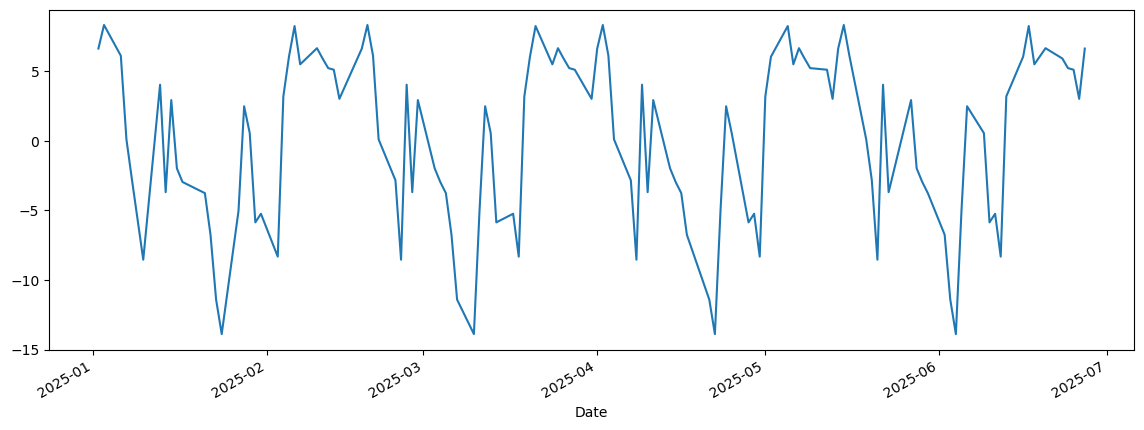

In [12]:
additive_seasonal.plot(figsize = (14, 5))

<Axes: xlabel='Date'>

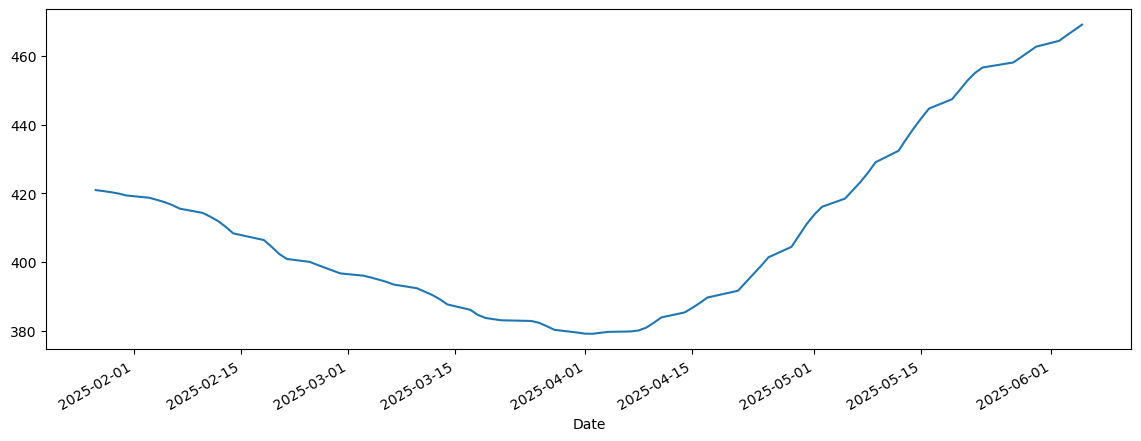

In [13]:
additive_trend.plot(figsize = (14, 5))

<Axes: xlabel='Date'>

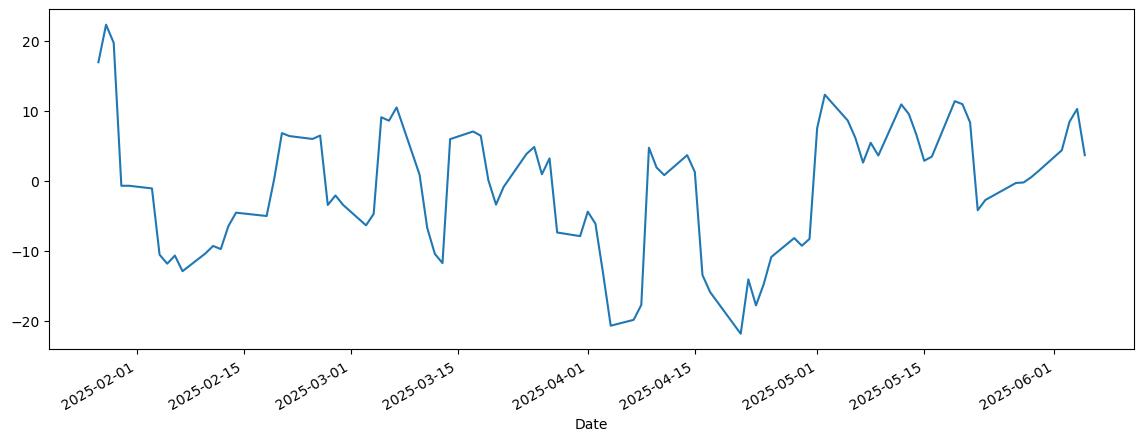

In [14]:
additive_residual.plot(figsize = (14, 5))

In [36]:
# STL decomposition using loees method
from statsmodels.tsa.seasonal import STL

In [38]:
stl = STL(data["Close"], period = 30)

In [46]:
result = stl.fit()

<Axes: xlabel='Date'>

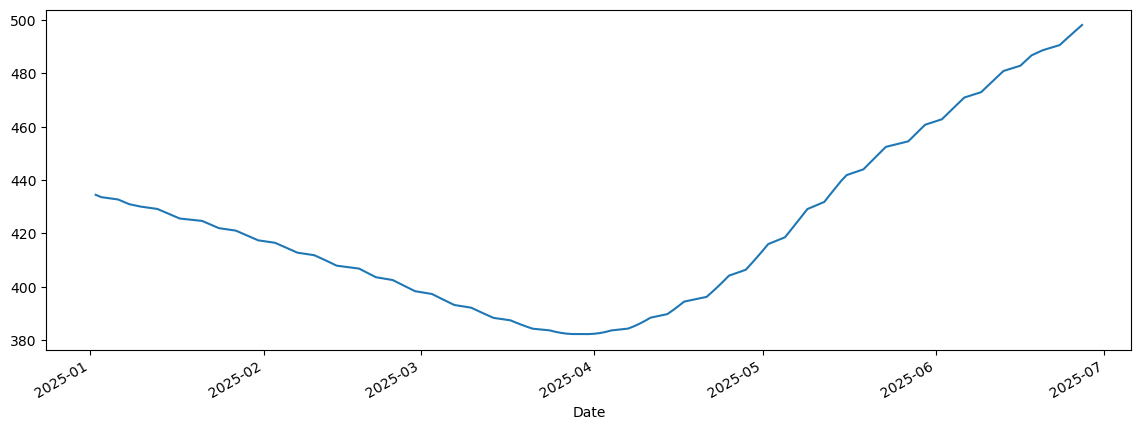

In [56]:
result.trend.plot(figsize = (14, 5))

<Axes: xlabel='Date'>

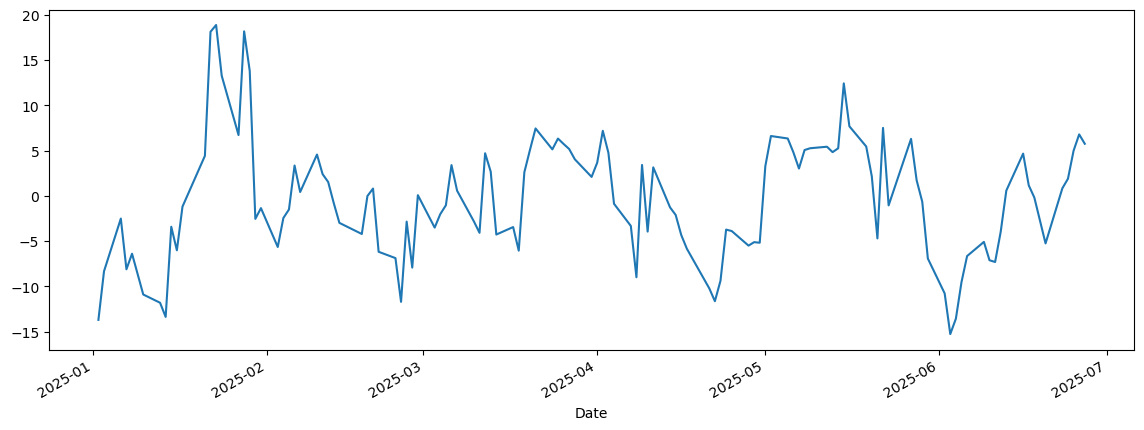

In [58]:
result.seasonal.plot(figsize = (14, 5))

<Axes: xlabel='Date'>

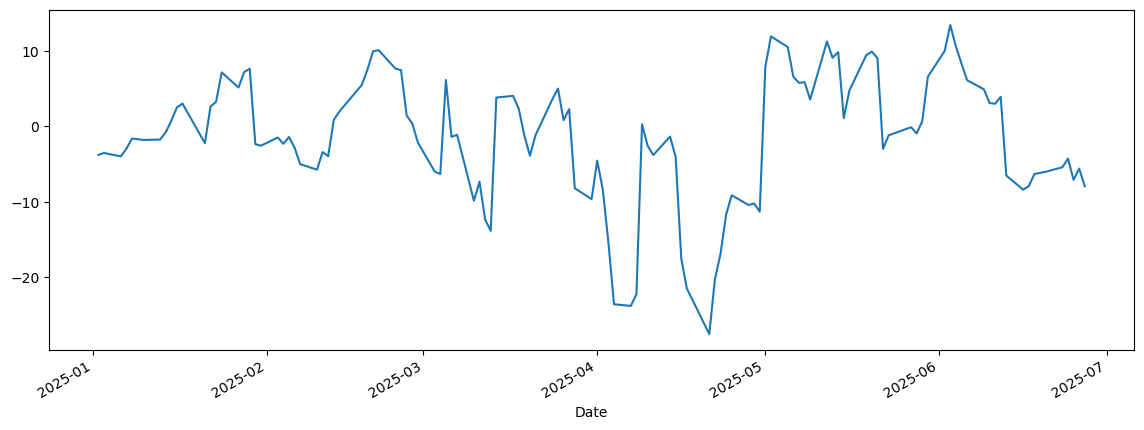

In [60]:
result.resid.plot(figsize = (14, 5))